### import libraries

In [66]:
import numpy as np
import os
import pickle
import csv
import math
from gensim.models import Word2Vec
from sklearn.utils import resample
import random

random.seed(3919)
import pandas as pd
import re
from collections import Counter
from pprint import pprint
import itertools

In [67]:

from wordcloud import WordCloud

In [68]:
import matplotlib.pyplot as plt

### import data

In [69]:
df = pd.read_pickle('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/corpus_president_of_russia/df_merged_retrieved.pkl')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6779 entries, 0 to 4311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        6779 non-null   object
 1   url         6779 non-null   object
 2   title       6779 non-null   object
 3   speaker     6779 non-null   object
 4   text        6779 non-null   object
 5   text_clean  6779 non-null   object
 6   word_count  6779 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 423.7+ KB


In [6]:
word_to_find = 'миропорядок'
mask = df['text_clean'].str.contains(word_to_find)

if mask.any():
    print(f"The word '{word_to_find}' is present in at least one row.")
    rows_with_word = df[mask]
    print(f"The word appears in {len(rows_with_word)} rows.")
else:
    print(f"The word '{word_to_find}' is not present in any row.")

The word 'миропорядок' is present in at least one row.
The word appears in 131 rows.


In [10]:
word_to_find = 'русский_мир'
mask = df['text_clean'].str.contains(word_to_find)

if mask.any():
    print(f"The word '{word_to_find}' is present in at least one row.")
    rows_with_word = df[mask]
    print(f"The word appears in {len(rows_with_word)} rows.")
else:
    print(f"The word '{word_to_find}' is not present in any row.")

The word 'русский_мир' is present in at least one row.
The word appears in 130 rows.


In [11]:
word_to_find = 'национальная_безопасность'
mask = df['text_clean'].str.contains(word_to_find)

if mask.any():
    print(f"The word '{word_to_find}' is present in at least one row.")
    rows_with_word = df[mask]
    print(f"The word appears in {len(rows_with_word)} rows.")
else:
    print(f"The word '{word_to_find}' is not present in any row.")

The word 'национальная_безопасность' is present in at least one row.
The word appears in 246 rows.


In [12]:
word_to_find = 'международное_право'
mask = df['text_clean'].str.contains(word_to_find)

if mask.any():
    print(f"The word '{word_to_find}' is present in at least one row.")
    rows_with_word = df[mask]
    print(f"The word appears in {len(rows_with_word)} rows.")
else:
    print(f"The word '{word_to_find}' is not present in any row.")

The word 'международное_право' is present in at least one row.
The word appears in 1554 rows.


### text processing

In [9]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.ru.stop_words import STOP_WORDS
#run the first model with no customised stopwords to see what are the most common (useless) words

In [10]:
nlp_spacy = spacy.load('ru_core_news_sm', exclude=["ner"])
nlp_spacy.disable_pipe("parser")
nlp_spacy.enable_pipe("senter")

In [11]:
lemma = []
#Turn words into lemmas
for doc in nlp_spacy.pipe(df['text_clean'].astype('unicode').values, batch_size=50):
    lemma.append([n.lemma_ for n in doc
                if n.lemma_ not in STOP_WORDS])

df['lemma'] = lemma

In [15]:
df['lemma']

0       [добрый, день, уважаемый, коллега, сегодня, по...
1       [добрый, день, уважаемый, друг, коллега, позво...
2       [добрый, день, уважаемый, коллега, повестка, д...
3       [добрый, день, уважаемый, коллега, сегодняшний...
4       [добрый, день, уважаемый, коллега, сегодня, пр...
                              ...                        
4294    [вопрос, западный, партнёры, переставать, удив...
4304    [вопрос, перевод, английский, возможность, рис...
4309    [святейшество, благодарить, приглашение, конта...
4310    [превосходительство, дама, господин, дорогой, ...
4311    [высокопреосвященство, рад, встретиться, москв...
Name: lemma, Length: 6779, dtype: object

In [13]:
#from office PC
df.to_pickle('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/corpus_president_of_russia/df_lemma.pkl')

In [70]:
df = pd.read_pickle('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/corpus_president_of_russia/df_lemma.pkl')

In [7]:
#from Mac
df = pd.read_pickle('/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/russia_lio_contestation/corpus_president_of_russia/df_lemma.pkl')

In [23]:
word_count = 0
for doc in df['lemma']:
    if 'миропорядок' in doc:
        word_count += doc.count('миропорядок')

print(f"'миропорядок' appears {word_count} times in the 'lemma' column of the DataFrame.")


'миропорядок' appears 501 times in the 'lemma' column of the DataFrame.


In [24]:
word_count = 0
for doc in df['lemma']:
    if 'международное_право' in doc:
        word_count += doc.count('международное_право')

print(f"'международное_право' appears {word_count} times in the 'lemma' column of the DataFrame.")


'международное_право' appears 2847 times in the 'lemma' column of the DataFrame.


In [25]:
word_count = 0
for doc in df['lemma']:
    if 'национальная_безопасность' in doc:
        word_count += doc.count('национальная_безопасность')

print(f"'национальная_безопасность' appears {word_count} times in the 'lemma' column of the DataFrame.")


'национальная_безопасность' appears 305 times in the 'lemma' column of the DataFrame.


In [27]:
word_count = 0
for doc in df['lemma']:
    if 'русский_мир' in doc:
        word_count += doc.count('русский_мир')

print(f"'русский_мир' appears {word_count} times in the 'lemma' column of the DataFrame.")


'русский_мир' appears 214 times in the 'lemma' column of the DataFrame.


In [16]:
word_count = 0
for doc in df['lemma']:
    if 'евразия' in doc:
        word_count += doc.count('евразия')

print(f"'евразия' appears {word_count} times in the 'lemma' column of the DataFrame.")


'евразия' appears 322 times in the 'lemma' column of the DataFrame.


### word frequencz and word cloud

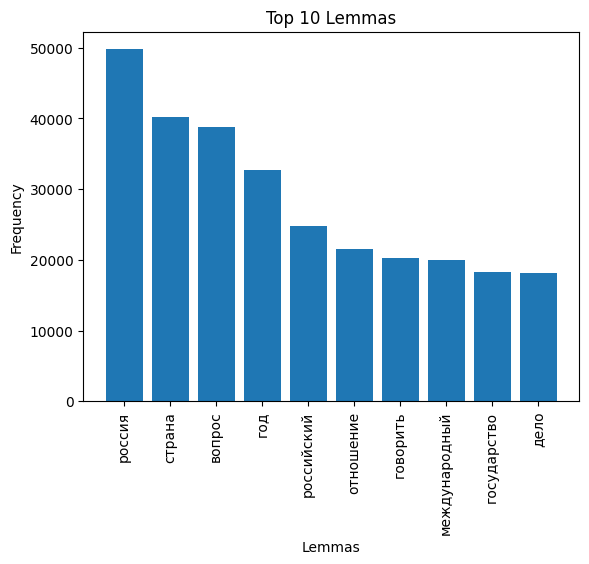

In [71]:
from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all lemmas into a single list
lemmas = [lemma for doc in df['lemma'] for lemma in doc]

# Count the frequency of each lemma
lemma_counts = Counter(lemmas)

# Sort lemmas by frequency in descending order
sorted_lemmas = sorted(lemma_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 'n' lemmas based on frequency
n = 10  # change this to select a different number of top lemmas
top_lemmas = [lemma[0] for lemma in sorted_lemmas[:n]]
top_counts = [lemma[1] for lemma in sorted_lemmas[:n]]

# Plot the top lemmas as a histogram
plt.bar(top_lemmas, top_counts)
plt.xticks(rotation=90)
plt.xlabel('Lemmas')
plt.ylabel('Frequency')
plt.title(f'Top {n} Lemmas')
plt.show()


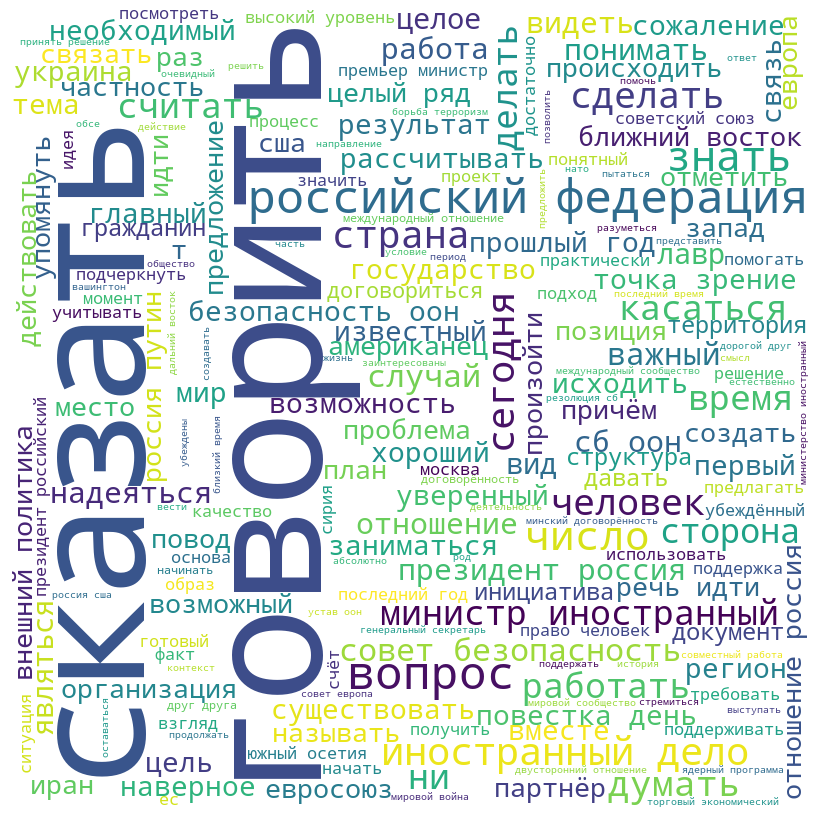

In [13]:
# Concatenate all lemmas into a single string
text = ' '.join([lemma for doc in df['lemma'] for lemma in doc])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [72]:
##### alternative method for Bigrams

data_lemma =df['lemma'].tolist()
docs = data_lemma

# Add bigrams
from gensim.models.phrases import Phrases
phrases = Phrases(docs, min_count= 10, threshold= 0.5)
df['phrased_lemma'] = df['lemma'].map(lambda s: phrases[s])

In [73]:
df['phrased_lemma']

0       [добрый_день, уважаемый_коллега, сегодня_подпи...
1       [добрый_день, уважаемый_друг, коллега, позволи...
2       [добрый_день, уважаемый_коллега, повестка_день...
3       [добрый_день, уважаемый_коллега, сегодняшний_п...
4       [добрый_день, уважаемый_коллега, сегодня_прово...
                              ...                        
4294    [вопрос, западный_партнёры, переставать, удивл...
4304    [вопрос_перевод, английский, возможность, риск...
4309    [святейшество, благодарить_приглашение, контак...
4310    [превосходительство_дама, господин_дорогой, др...
4311    [высокопреосвященство, рад, встретиться_москва...
Name: phrased_lemma, Length: 6779, dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6779 entries, 0 to 4311
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           6779 non-null   object
 1   url            6779 non-null   object
 2   title          6779 non-null   object
 3   speaker        6779 non-null   object
 4   text           6779 non-null   object
 5   text_clean     6779 non-null   object
 6   word_count     6779 non-null   int64 
 7   lemma          6779 non-null   object
 8   phrased_lemma  6779 non-null   object
dtypes: int64(1), object(8)
memory usage: 529.6+ KB


In [75]:
data_lemma =df['phrased_lemma'].tolist()
docs = data_lemma

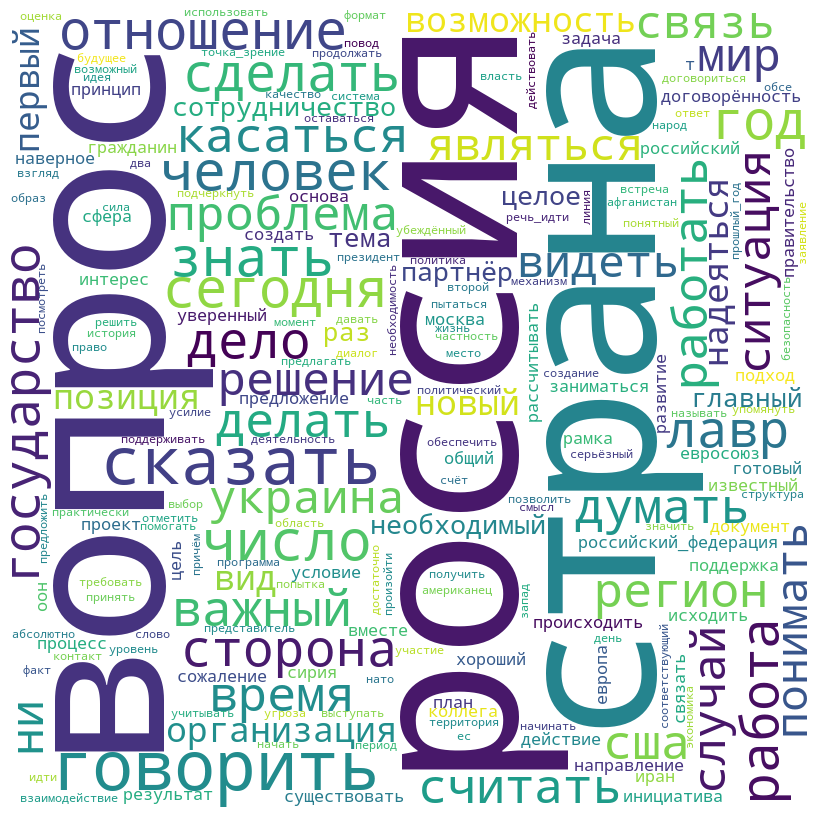

In [76]:
# Concatenate all lemmas and bigrams into a single string
text = ' '.join([lemma for doc in docs for lemma in phrases[doc]])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### preprocess all words related to your concepts

In [77]:
#миропорядок
prefix = 'миропоряд'
replacement = 'миропорядок'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [78]:
# change every мироустройство in миропорядок to make the wordembedding easier and more consistent
prefix = 'мироустройств'
replacement = 'миропорядок'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [79]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'миропорядок' in doc:
        word_count += doc.count('миропорядок')

print(f"'миропорядок' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")

'миропорядок' appears 640 times in the 'phrased_lemma' column of the DataFrame.


In [ ]:
# concepts for measuring similarity (1st group)

#eurasianism = ['евразия','русский_мир', 'цивилизация', 'запад', 'гегемония']
#westphalianism = ['великодержавн','статус','суверенн','международное_право']

In [80]:
#цивилизация
prefix = 'цивилизаци'
replacement = 'цивилизация'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [81]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'цивилизация' in doc:
        word_count += doc.count('цивилизация')

print(f"'цивилизация' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")

'цивилизация' appears 730 times in the 'phrased_lemma' column of the DataFrame.


In [82]:
#евразия
prefix = 'еврази'
replacement = 'евразия'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [83]:
word_count = 0
for doc in df['lemma']:
    if 'евразия' in doc:
        word_count += doc.count('евразия')

print(f"'евразия' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'евразия' appears 322 times in the 'phrased_lemma' column of the DataFrame.


In [84]:
#гегемон
prefix = 'гегемон'
replacement = 'гегемония'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [85]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'гегемония' in doc:
        word_count += doc.count('гегемония')

print(f"'гегемония' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'гегемония' appears 83 times in the 'phrased_lemma' column of the DataFrame.


In [86]:
#запад
prefix = 'запад'
replacement = 'запад'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [87]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'запад' in doc:
        word_count += doc.count('запад')

print(f"'запад' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'запад' appears 6837 times in the 'phrased_lemma' column of the DataFrame.


In [88]:
#великодержавн
prefix = 'великодержавн'
replacement = 'великодержавность'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [89]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'великодержавность' in doc:
        word_count += doc.count('великодержавность')

print(f"'великодержавность' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'великодержавность' appears 12 times in the 'phrased_lemma' column of the DataFrame.


In [90]:
#суверенн
prefix = 'суверенн'
replacement = 'суверенность'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [91]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'суверенность' in doc:
        word_count += doc.count('суверенность')

print(f"'суверенность' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'суверенность' appears 854 times in the 'phrased_lemma' column of the DataFrame.


In [92]:
# concepts for measuring similarity (2 group)
#security_concerns = ['сфер', 'национальная_безопасность','противовес','дестабилизация','нато','угроза']
#multipolarism = ['многополярн', 'партнерств', 'сотрудничеств','альтернатив', 'выбор', 'развити', 'полицентричная', 'полицентричный']

In [93]:
#дестабилизия
prefix = 'дестабилиз'
replacement = 'дестабилизация'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [94]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'дестабилизация' in doc:
        word_count += doc.count('дестабилизация')

print(f"'дестабилизация' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'дестабилизация' appears 371 times in the 'phrased_lemma' column of the DataFrame.


In [95]:
#угроза
prefix = 'угроз'
replacement = 'угроза'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [96]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'угроза' in doc:
        word_count += doc.count('угроза')

print(f"'угроза' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'угроза' appears 3332 times in the 'phrased_lemma' column of the DataFrame.


In [97]:
#многополярный
prefix = 'многополярн'
replacement = 'многополярный'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])

In [98]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'многополярный' in doc:
        word_count += doc.count('многополярный')

print(f"'многополярный' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'многополярный' appears 429 times in the 'phrased_lemma' column of the DataFrame.


In [99]:
#полицентричный
prefix = 'полицентричн'
replacement = 'полицентричный'

df['phrased_lemma'] = df['phrased_lemma'].apply(lambda x: [replacement if w.startswith(prefix) else w for w in x])


In [100]:
word_count = 0
for doc in df['phrased_lemma']:
    if 'полицентричный' in doc:
        word_count += doc.count('полицентричный')

print(f"'полицентричный' appears {word_count} times in the 'phrased_lemma' column of the DataFrame.")


'полицентричный' appears 295 times in the 'phrased_lemma' column of the DataFrame.


In [59]:
#save lemma with preprocessed text (Mac)
df.to_pickle('/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/russia_lio_contestation/corpus_president_of_russia/.df_lemma_preprocessing.pkl')

In [101]:
#save lemma with preprocessed text (office PC)
df.to_pickle('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/corpus_president_of_russia/df_lemma_preprocessing.pkl')

In [4]:
#read df phrased lemma with preprocessed text (from office PC)
df = pd.read_pickle('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/corpus_president_of_russia/df_lemma_preprocessing.pkl')

### Model Training: Gensim Word2Vec

In [47]:
import multiprocessing
cores = multiprocessing.cpu_count()
print(cores)

12


In [ ]:
# model: sg
# vector_size: 100
# n_neighbours: 30

In [102]:
sents = df['phrased_lemma']

model = Word2Vec(
    sents,
    vector_size=100, 
    min_count=0, 
    sg=1, 
    hs=0, 
    negative=5, 
    window=30, 
    workers=4,
    epochs = 100
)

In [103]:
model.wv.most_similar(positive = ['миропорядок'],topn=20)
# check for synonyms

[('полицентричный', 0.8527029156684875),
 ('формирование_полицентричного', 0.820906400680542),
 ('демократический_справедливый', 0.8150774240493774),
 ('справедливый_демократический', 0.8125821352005005),
 ('международный_система', 0.8066527843475342),
 ('многополярный', 0.805690586566925),
 ('демократический_полицентричного', 0.7952263951301575),
 ('демократический_система', 0.791087806224823),
 ('формирование_многополярный', 0.7885502576828003),
 ('объективный_процесс', 0.7861343622207642),
 ('многообразие_современный', 0.7795619964599609),
 ('отражать_культурно', 0.7786999344825745),
 ('объективно_формироваться', 0.7784688472747803),
 ('новый_мироустройство', 0.7783229351043701),
 ('однополярная', 0.7770311832427979),
 ('пятисотлетнее', 0.774179220199585),
 ('справедливый_демократичный', 0.7732346057891846),
 ('ооноцентричной', 0.7725827693939209),
 ('новый_миропорядок', 0.7700087428092957),
 ('тенденция_формирование', 0.7696325182914734)]

In [111]:
model.wv.most_similar(positive = ['нато'],topn=20)

[('североатлантический_альянс', 0.8980079293251038),
 ('альянс', 0.893989622592926),
 ('член_нато', 0.8610290288925171),
 ('член_альянс', 0.8599770069122314),
 ('страна_альянс', 0.8273273706436157),
 ('нато_ни', 0.8255748152732849),
 ('приближаться_граница', 0.819914698600769),
 ('расширение_альянс', 0.8164706826210022),
 ('натовец', 0.8125178813934326),
 ('нато_говорить', 0.8095318078994751),
 ('фог_расмуссен', 0.8037939667701721),
 ('страна_нато', 0.8033711314201355),
 ('натовский', 0.8029653429985046),
 ('саммит_нато', 0.8001542091369629),
 ('член_североатлантический', 0.797795295715332),
 ('продвижение_нато', 0.7956307530403137),
 ('расширяться_восток', 0.7909676432609558),
 ('военный_инфраструктура', 0.7909462451934814),
 ('натовский_коллега', 0.7876189947128296),
 ('совет_россия', 0.7863121032714844)]

In [106]:
#save the model (from Mac)
#model.wv.save_word2vec_format('/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/russia_lio_contestation/wordembedding/models/model' + '.bin', binary = True)

In [110]:
import os
print(os.getcwd()) # prints the current working directory
#save the model (from office)
model.wv.save_word2vec_format('/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/wordembedding/models/model2.bin', binary=True)


c:\Users\adrianacupp\Desktop\GitHub\russia_lio_contestation\wordembedding


In [53]:
similarity = model.wv.similarity('миропорядок', 'многополярный')
print('Similarity between "миропорядок" and "еврази": {:.2f}'.format(similarity))

Similarity between "миропорядок" and "еврази": 0.80


#### compare similarity of миропорядок and concepts

In [56]:
#eurasianism
target_word = 'миропорядок'
eurasianism = ['евразия','русский_мир', 'цивилизация', 'доминирование_запад', 
               'правило_запад','запад', 'гегемония']

for word in eurasianism:
    similarity_score = model.wv.similarity(target_word, word)
    print(f"Similarity between '{target_word}' and '{word}': {similarity_score}")


Similarity between 'миропорядок' and 'евразия': 0.34417229890823364
Similarity between 'миропорядок' and 'русский_мир': 0.2535952627658844
Similarity between 'миропорядок' and 'цивилизация': 0.5614332556724548
Similarity between 'миропорядок' and 'доминирование_запад': 0.7311944961547852
Similarity between 'миропорядок' and 'правило_запад': 0.7430440187454224
Similarity between 'миропорядок' and 'запад': 0.5252674221992493
Similarity between 'миропорядок' and 'гегемония': 0.667038083076477


In [57]:
#westphalianism
target_word = 'миропорядок'
westphalianism = [ 'оон','великодержавность','статус','принцип_суверенный','международное_право',
                  'демократический_справедливый','международное_право_норма', 'ооноцентричной' ]

for word in westphalianism:
    similarity_score = model.wv.similarity(target_word, word)
    print(f"Similarity between '{target_word}' and '{word}': {similarity_score}")

Similarity between 'миропорядок' and 'оон': 0.4818551540374756
Similarity between 'миропорядок' and 'великодержавность': 0.4850997030735016
Similarity between 'миропорядок' and 'статус': 0.185061514377594
Similarity between 'миропорядок' and 'принцип_суверенный': 0.6801886558532715
Similarity between 'миропорядок' and 'международное_право': 0.6547071933746338
Similarity between 'миропорядок' and 'демократический_справедливый': 0.815528929233551
Similarity between 'миропорядок' and 'международное_право_норма': 0.7272929549217224
Similarity between 'миропорядок' and 'ооноцентричной': 0.7648032903671265


In [112]:
#security_concerns
target_word = 'миропорядок'
security_concerns = ['сфера', 'национальная_безопасность','противовес','дестабилизация',
                     'нато','угроза','подменить_международное_право','порядок_основать', 
                     'однополярная','новый_мироустройство', 'расширяться_восток',
                     'однополярный_модель', 'однополярный', 'военный_инфраструктура']

for word in security_concerns:
    similarity_score = model.wv.similarity(target_word, word)
    print(f"Similarity between '{target_word}' and '{word}': {similarity_score}")

Similarity between 'миропорядок' and 'сфера': 0.31543388962745667
Similarity between 'миропорядок' and 'национальная_безопасность': 0.21227902173995972
Similarity between 'миропорядок' and 'противовес': 0.6101769208908081
Similarity between 'миропорядок' and 'дестабилизация': 0.33506661653518677
Similarity between 'миропорядок' and 'нато': 0.266032338142395
Similarity between 'миропорядок' and 'угроза': 0.3689481317996979
Similarity between 'миропорядок' and 'подменить_международное_право': 0.7535013556480408
Similarity between 'миропорядок' and 'порядок_основать': 0.7461512088775635
Similarity between 'миропорядок' and 'однополярная': 0.7770312428474426
Similarity between 'миропорядок' and 'новый_мироустройство': 0.7783229947090149
Similarity between 'миропорядок' and 'расширяться_восток': 0.36692285537719727
Similarity between 'миропорядок' and 'однополярный_модель': 0.7372355461120605
Similarity between 'миропорядок' and 'однополярный': 0.7576110363006592
Similarity between 'миропор

In [59]:
#multipolarism
target_word = 'миропорядок'
multipolarism = ['многополярный', 'партнёрство', 'сотрудничество', 'полицентричный',
                 'формирование_многополярный', 'формирование_полицентричного', 'демократический_полицентричного']

for word in multipolarism:
    similarity_score = model.wv.similarity(target_word, word)
    print(f"Similarity between '{target_word}' and '{word}': {similarity_score}")

Similarity between 'миропорядок' and 'многополярный': 0.7956210970878601
Similarity between 'миропорядок' and 'партнёрство': 0.4100978970527649
Similarity between 'миропорядок' and 'сотрудничество': 0.36341986060142517
Similarity between 'миропорядок' and 'полицентричный': 0.8703908920288086
Similarity between 'миропорядок' and 'формирование_многополярный': 0.7788729667663574
Similarity between 'миропорядок' and 'формирование_полицентричного': 0.8090696334838867


In [ ]:
# calcola ogni concetto e poi prendi la parola più significativa sulla dimensione tempo